# Slang Translator

In [1]:
import pandas as pd
import os

In [2]:
current_directory = os.path.realpath('data.py')
parent_directory = parent_directory = os.path.dirname(current_directory)


In [3]:
class ImportData:

    def __ini__(self):
        self.current_directory = current_directory
        self.parent_directory = parent_directory

    def abbreviations():

        data_abbreviations = pd.read_csv(os.path.join(parent_directory,'..','..' ,'live-sentiment-tracker', 'data_raw','Abbreviations_and_Slang.csv'))

        return data_abbreviations

    def slangs():

        data_slangs = pd.read_csv(os.path.join(parent_directory,'..','..', 'live-sentiment-tracker','data_raw','slang.csv'))[['acronym', 'expansion']]

        return data_slangs

In [4]:
data_abbreviations = ImportData.abbreviations()
data_slangs = ImportData.slangs()

remove_list = [13, 15, 16, 27, 41, 63, 66, 67, 112]
add_list = [159, 160, 185, 330, 2362]

In [5]:
# Concatenating slang and abbreviation datasets
data_slangs.rename(columns = {'acronym':'Abbreviations','expansion':'Text'}, inplace = True)
data_slangs = data_slangs[data_slangs.index.isin(add_list)]
data_abbreviations.drop(axis=0, labels=remove_list, inplace=True)
data_slang_all = pd.concat([data_abbreviations , data_slangs], axis=0)

# Drop duplicates and null values
data_slang_all.drop_duplicates(inplace=True)
data_slang_all.dropna(inplace=True)

# Checking
print(f'Data + Slang full dataset shape: {data_slang_all.shape}')
print(f'Data + Slang full dataset null: {data_slang_all.isnull().sum()[0]}')
print(f'Data + Slang full dataset duplicates: {data_slang_all.duplicated().sum()}')

Data + Slang full dataset shape: (108, 2)
Data + Slang full dataset null: 0
Data + Slang full dataset duplicates: 0


/tmp/ipykernel_14306/1304852085.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Data + Slang full dataset null: {data_slang_all.isnull().sum()[0]}')


In [6]:
#data_slang_all.to_csv('data_slang_all_preprocessed.csv')

In [7]:
# Transforming DF into dict for mapping
slang_dict = dict(zip(data_slang_all.Abbreviations, data_slang_all.Text))

In [8]:
import string

class SlangTranslation:

  def __init__(self, sentence):

    self.sentence = sentence

  def remove_punctuation(self, sentence):
    """Iterates through each word of the string and removes punctuation"""
    for punctuation in string.punctuation:
        sentence = sentence.replace(punctuation, '')

    return sentence

  def string_translator(self, sentence):
    """Iterates through each word of the string and translates them"""

    sentence = ' '.join([slang_dict.get(i, i) for i in sentence.split()])

    return sentence

  def apply_translator(self, sentence):
    """Takes the text column as input, outputs the same column translated."""

    sentence = self.remove_punctuation(sentence)

    sentence = self.string_translator(sentence)

    return sentence

# Model

## Vader (return overall sentiment)

In [9]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def vader(sentence):
    """
    Function to print sentiment and return overall sentiment
    """
    # Instanciating SentimentIntensityAnalyzer object
    vader_model = SentimentIntensityAnalyzer()
    sentence = SlangTranslation(sentence).apply_translator(sentence)
    # Creating sentiment dict from vader model
    sentiment_dict = vader_model.polarity_scores(sentence)

    # Printing sentiment percentage
    print(f'Sentence: "{sentence}"')
    print(f"This sentence is: {sentiment_dict['pos']*100} % positive")
    print(f"{sentiment_dict['neu']*100} % neutral")
    print(f"{sentiment_dict['neg']*100} % negative")

    # Conditional to return overall sentiment of the sentence
    if sentiment_dict['compound'] >= 0.05:
        overall_sentiment = 'The overall sentiment is Positive 😊'
        return overall_sentiment

    if sentiment_dict['compound'] <= -0.05:
        overall_sentiment = 'The overall sentiment is Negative 😔'
        return overall_sentiment

    else:
        overall_sentiment = 'The overall sentiment is Neutral 😐'
        return overall_sentiment


## Vader (return vader scores)

In [10]:

def vader_scores(sentence):
    """
    Function to return the dict with the sentiments
    """
    vader_model = SentimentIntensityAnalyzer()
    sentence = SlangTranslation(sentence).apply_translator(sentence)
    sentiment_dict = vader_model.polarity_scores(sentence)
    #print(f'Sentence: "{sentence}"')
    return sentiment_dict


In [11]:
sentence = "i used to be happy but now i am sad"

In [12]:
print(vader(sentence))
print(f"\nWeighs: {vader_scores(sentence)}")

Sentence: "i used to be happy but now i am sad"
This sentence is: 16.2 % positive
55.2 % neutral
28.599999999999998 % negative
The overall sentiment is Negative 😔

Weighs: {'neg': 0.286, 'neu': 0.552, 'pos': 0.162, 'compound': -0.4215}


# Plotting

## Word Cloud and imdb movie reiview distribution (no need to pass to the main code - just colapse the cells bellow)

In [13]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [14]:
def mapping_emotions():
    from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
    import matplotlib.pyplot as plt


    stopwords = STOPWORDS
    # text = 'Fun, fun, awesome, awesome, tubular, astounding, superb, great, amazing, amazing, amazing, amazing'
    text = "I, hate, hate, fun, fun, awesome, awesome, awesome, believe, can't, amazing, amazing, amazing"


    # Create and generate a word cloud image:
    wordcloud = WordCloud(stopwords=stopwords, background_color= "white", width=440, height=280, colormap='Set3').generate(text)

    # Display the generated image:

    fig, ax = plt.subplots(figsize = (10, 6))
    ax.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show(fig)

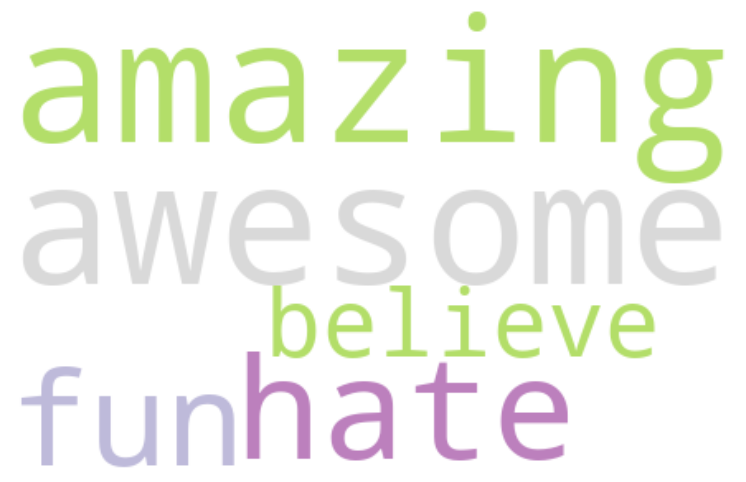

In [15]:
mapping_emotions()

In [16]:
import sys, os

In [17]:
# Disable
def blockPrint():
    sys.stdout = open(os.devnull, 'w')

# Restore
def enablePrint():
    sys.stdout = sys.__stdout_

In [18]:
blockPrint()

In [19]:
imdb = pd.read_csv(os.path.join(parent_directory,'..','..' ,'live-sentiment-tracker', 'data_raw','IMDB Dataset.csv'))

In [20]:
imdb = imdb['review']

In [21]:
imdb1000 = imdb.sample(1000)

In [22]:
test = []
for tweet in imdb1000.sample(1000):
    test.append(vader(tweet)[25:-2])

In [23]:
test

['Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Negative',
 'Positive',
 'Neutral',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Negative',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

/tmp/ipykernel_14306/3605737478.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(test, palette="muted")


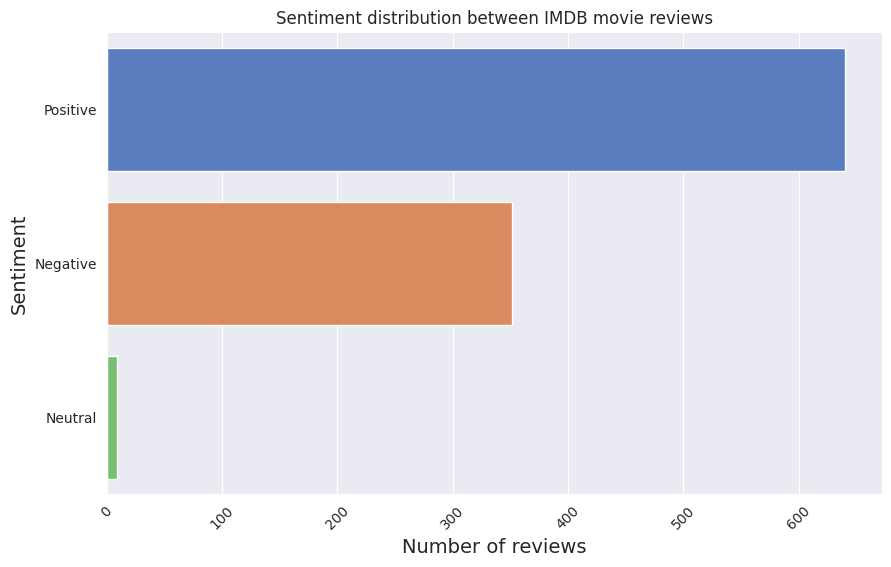

In [25]:
sns.set_style("darkgrid")

plt.figure(figsize=(10,6))

sns.countplot(test, palette="muted")

plt.title("Sentiment distribution between IMDB movie reviews")

plt.xlabel("Number of reviews", fontsize=14)
plt.ylabel("Sentiment", fontsize=14)

plt.xticks(rotation=45)

plt.show()

## Progressive sentiment graph

In [26]:
from nltk.tokenize import word_tokenize

tokenized_sentence = word_tokenize(SlangTranslation(sentence).apply_translator(sentence))

In [27]:
# Create a list of lists with the progression word by word of the final sentence
sentences = []
for i in range(1, len(tokenized_sentence) + 1):
    new_sentence = ' '.join(tokenized_sentence[:i])
    sentences.append([new_sentence])

# Create a list of dicts with the vader_scores for each section of the sentence
progressive_scores = []
for i in sentences:
    progressive_scores.append(vader_scores(i[0]))

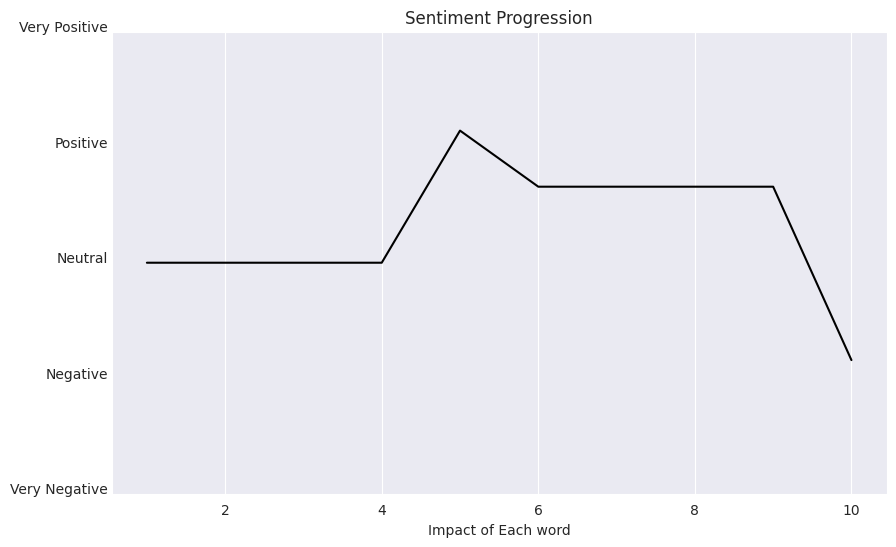

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculating the compound value for each word added in the sentence
compound_values = [score['compound'] for score in progressive_scores]

# Seaborn config
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x=[i+1 for i in range(len(compound_values))], y=compound_values, marker=None, color="black")

# Adding title and labels
plt.title('Sentiment Progression')
plt.xlabel('Impact of Each word')

plt.text(0.5, 1, 'Very Positive', ha='right')
plt.text(0.5, 0.5, 'Positive', ha='right')
plt.text(0.5, 0, 'Neutral', ha='right')
plt.text(0.5, -0.5, 'Negative', ha='right')
plt.text(0.5, -1, 'Very Negative', ha='right')

plt.ylim(-1, 1)
plt.yticks([])

plt.show()

## Creating user's input wordcloud - not finished yet

In [30]:
weights_dict = {}

for sublist, scores_dict in zip(sentences, progressive_scores):
    scores_dict = scores_dict.copy()
    scores_dict.pop('compound', None)
    max_score = round(max(scores_dict.values()) * 10)
    weights_dict[tuple(sublist)] = max_score

In [31]:
# Iterar sobre as chaves e valores do dicionário
chaves = list(weights_dict.keys())
valores = list(weights_dict.values())
# Iterar sobre os valores e subtrair o valor atual pelo valor anterior
for i in range(1, len(valores)):
    diferenca = valores[i] - valores[i-1]
    weights_dict[chaves[i]] = diferenca


In [32]:
weights_dict

{('i',): 10,
 ('i used',): 0,
 ('i used to',): 0,
 ('i used to be',): 0,
 ('i used to be happy',): -5,
 ('i used to be happy but',): 2,
 ('i used to be happy but now',): 0,
 ('i used to be happy but now i',): 0,
 ('i used to be happy but now i am',): 1,
 ('i used to be happy but now i am sad',): -2}

In [33]:
#wc = WordCloud(stopwords=STOPWORDS, background_color= "white", width=440, height=280, colormap='Set3').generate(weighted_sentence)
#plt.imshow(wc, interpolation='bilinear');